In [ ]:
# Adatok letöltése Kaggle-ről

In [ ]:
import os
from google.colab import files

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d tanlikesmath/diabetic-retinopathy-resized



mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/tanlikesmath/diabetic-retinopathy-resized
License(s): unknown
100% 7.25G/7.25G [00:52<00:00, 163MB/s]
100% 7.25G/7.25G [00:52<00:00, 148MB/s]


In [ ]:
# Kicsomagolás

In [ ]:
!unzip diabetic-retinopathy-resized.zip

A streamkimeneten csak az utolsó 5000 sor látható.
  inflating: resized_train_cropped/resized_train_cropped/44260_right.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44261_left.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44261_right.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44262_left.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44262_right.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44263_left.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44263_right.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44264_left.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44264_right.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44265_left.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44265_right.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44267_left.jpeg  
  inflating: resized_train_cropped/resized_

In [ ]:
# Könyvtárak importálása

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

In [ ]:
# Adatok helyének a megadása

In [ ]:
data_dir = 'resized_train_cropped/resized_train_cropped'
labels_dir = 'trainLabels_cropped.csv'

In [ ]:
print(data_dir)
print(labels_dir)

resized_train_cropped/resized_train_cropped
trainLabels_cropped.csv


In [ ]:
# Címkék beolvasása

In [ ]:
labels_df = pd.read_csv(labels_dir)

In [ ]:
print(labels_df.head())

   Unnamed: 0.1  Unnamed: 0     image  level
0             0           0   10_left      0
1             1           1  10_right      0
2             2           2   13_left      0
3             3           3  13_right      0
4             4           4   15_left      1


In [ ]:
# Szükségtelen oszlopok kivétele

In [ ]:
labels_df = labels_df.drop(columns=['Unnamed: 0.1','Unnamed: 0'])

In [ ]:
print(labels_df.head())

      image  level
0   10_left      0
1  10_right      0
2   13_left      0
3  13_right      0
4   15_left      1


In [ ]:
img_name = labels_df.iloc[0, 0]
img_label = labels_df.iloc[0, 1]
print(img_label)
print(img_name)

0
10_left


In [ ]:
img_path = os.path.join(data_dir, img_name + '.jpeg')

# Check if the file exists
if not os.path.exists(img_path):
    print(f"File {img_path} does not exist.")
else:
    img = cv2.imread(img_path)

    # Check if the image was read correctly
    if img is None:
        print(f"Failed to load image {img_path}.")
    else:
        img = cv2.resize(img, (224, 224))

In [ ]:
img = cv2.imread(os.path.join(data_dir, img_name + '.jpeg'))
img = cv2.resize(img, (224, 224))

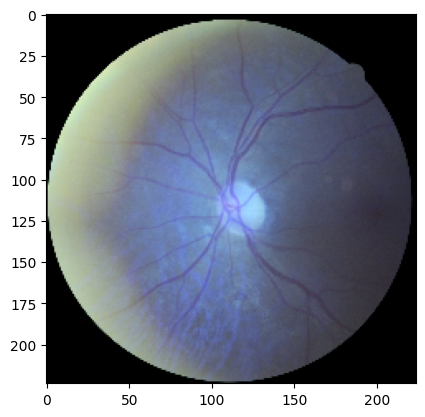

In [ ]:
plt.imshow(img)

In [ ]:
data = []
labels = []

In [ ]:
for i in range(len(labels_df)):
    img_name = labels_df.iloc[i, 0]
    img_label = labels_df.iloc[i, 1]
    img = cv2.imread(os.path.join(data_dir, img_name + '.jpeg'))
    img = cv2.resize(img, (224, 224))
    data.append(img)
    labels.append(img_label)

In [ ]:
# Adatok kimentése

In [ ]:
np.save('data.npy', data)
np.save('labels.npy', labels)

In [ ]:
from google.colab import files
files.download('data.npy')
files.download('labels.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>